# Data Exploration and Visualization
Visual exploration is important for any data related problem. We need to dedicate a large portion of our time for this step of the problem-solving. How can we learn as much as possible from our data before begining any machine learning?

#### Let's say you have been given this dataset with the following description on how the data was collected and preprocessed:
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKINGUPSTAIRS, WALKINGDOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

In [2]:
# To store data
import pandas as pd

# To do linear algebra
import numpy as np
from numpy import pi

# To create plots
import matplotlib.pyplot as plt
import seaborn as sns

# To get new datatypes and functions
from collections import Counter

# To investigate distributions
from scipy.stats import norm, skew, probplot
from scipy.optimize import curve_fit


In [21]:
# Let's load in the data and take a look
train = pd.read_csv('/projects/250c93cf-311b-4af0-b0c9-a55b21af396c/data/train.csv')
test = pd.read_csv('/projects/250c93cf-311b-4af0-b0c9-a55b21af396c/data/train.csv')

# Create label
labels = train.Activity

# Get a quick look at our data
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [22]:
# let's take a look at some of our features (columns of our dataframe)
train.describe()
train.isnull().sum()


tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


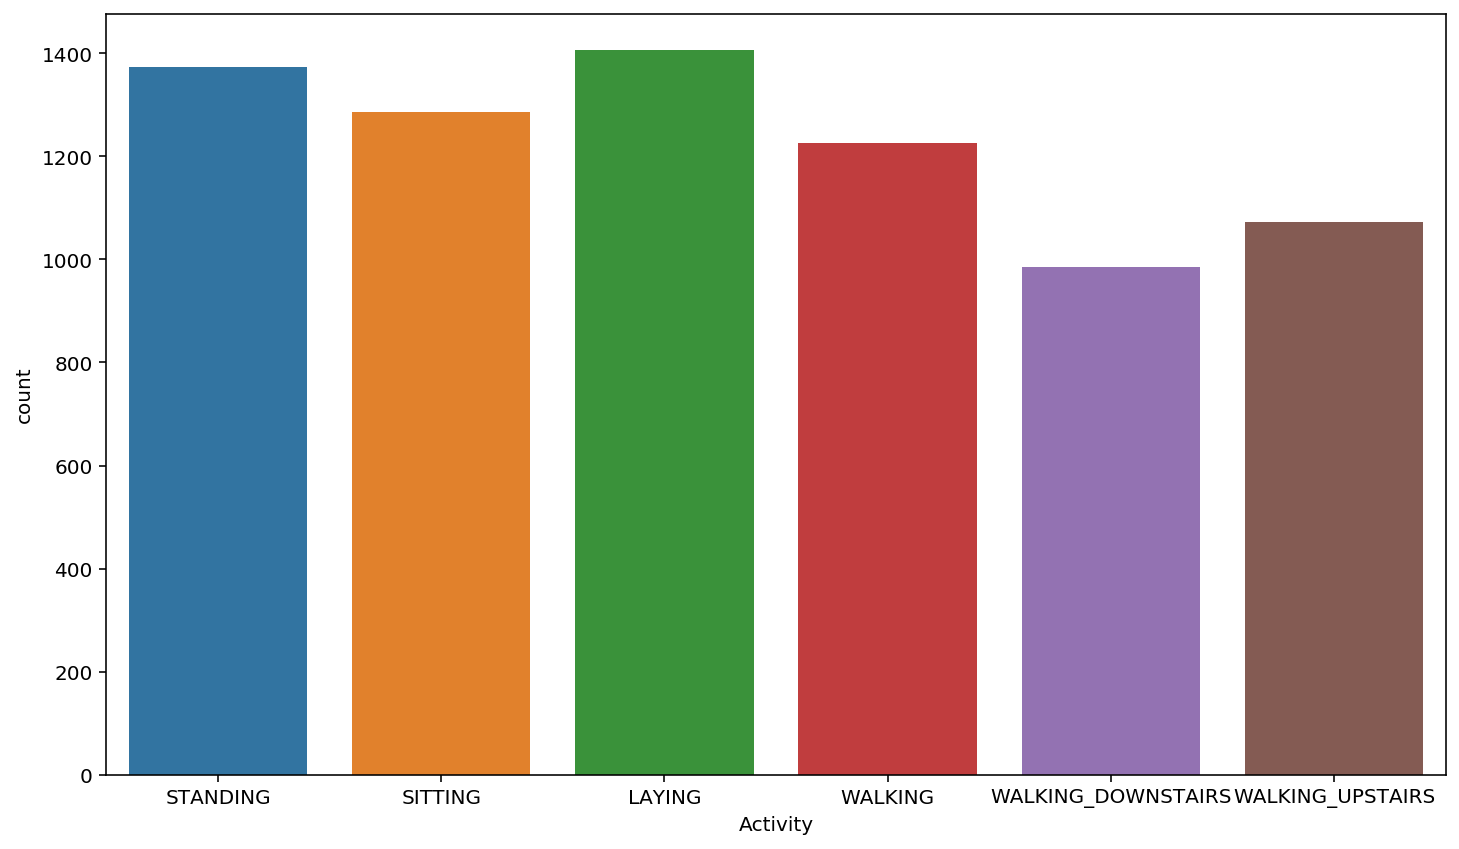

In [23]:
train.info()
train.shape

sns.countplot(x=labels, data=train)

### Which Features Are There?
The directors of the study created an incredible number of features from the two sensors --> 561

The features seem to have a main name and some information on how they have been computed attached. Grouping the main names will reduce the dimensions for the first impression.

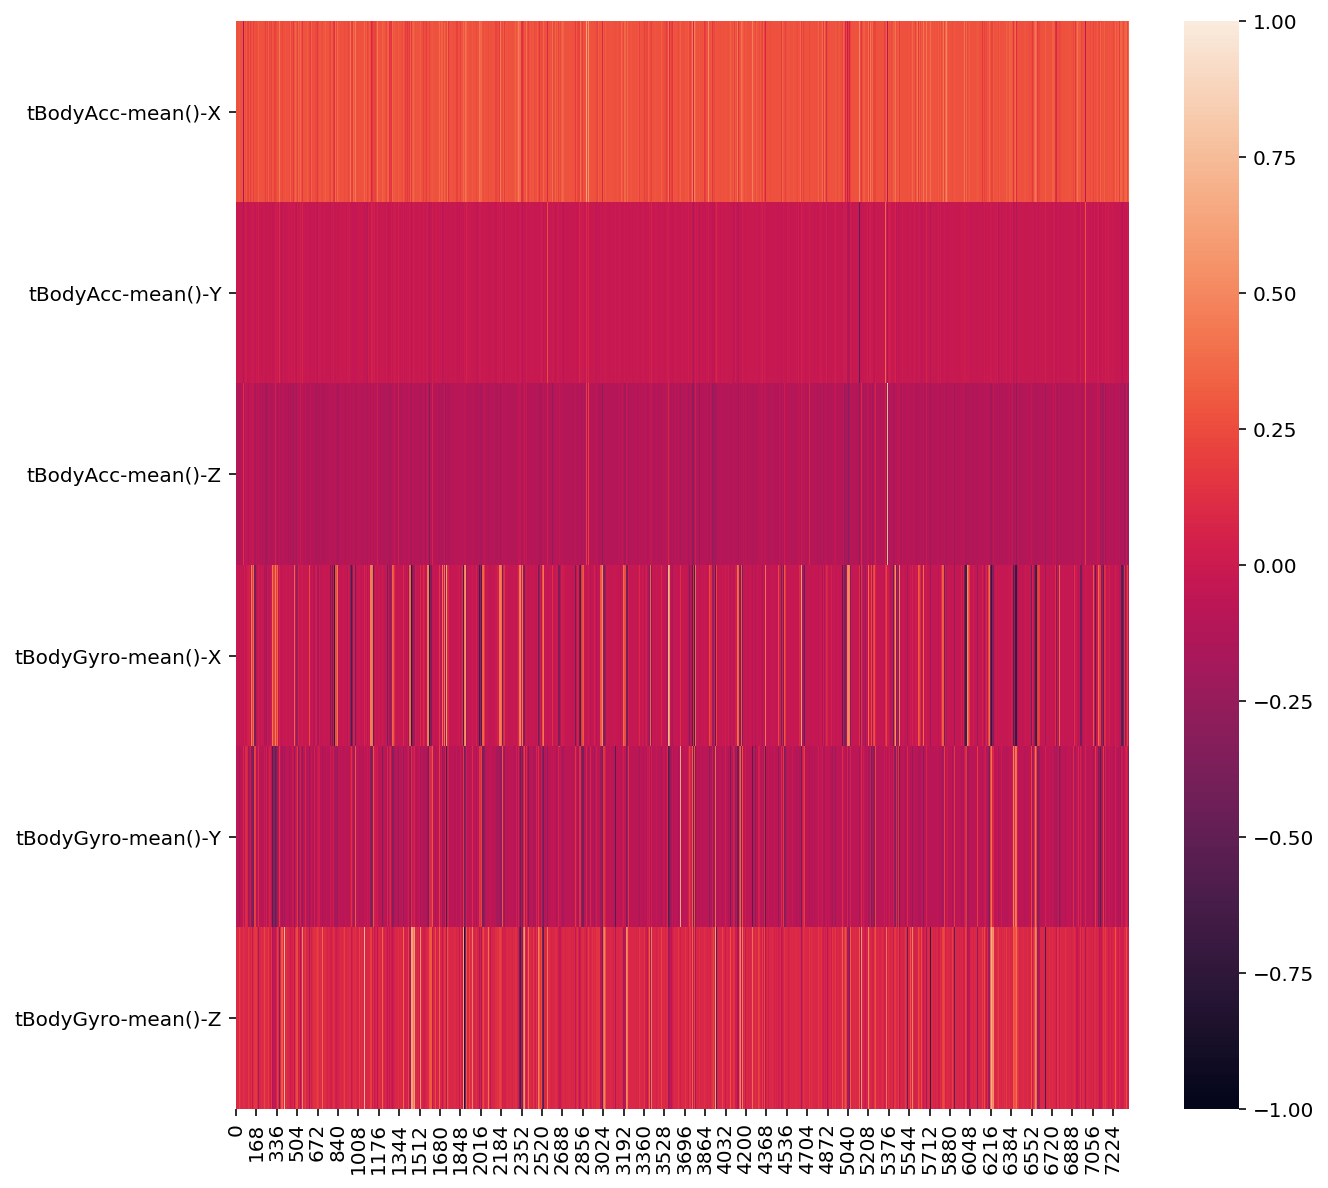

In [26]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(train[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y','tBodyAcc-mean()-Z','tBodyGyro-mean()-X','tBodyGyro-mean()-Y','tBodyGyro-mean()-Z']].T)
plt.show()

In [14]:
# Group main names to get first impression of data
main = pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]), orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)
main_names = main.index

main

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


In [27]:
# let's get some quick statistical summary of our data 
plt.figure(figsize=(7,7))
sns.boxplot(x='Activity', y='tBodyAccMag-mean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')

ValueError: Could not interpret input 'tBodyAccMag-mean'

<Figure size 504x504 with 0 Axes>

- we can see there are mainly "acceleration" and "Gryoscope" features, with also a few gravity

In [ ]:
# what are the dimensions of our data?



In [ ]:
# Are there missing values? If there are how many?



In [ ]:
# what are the data types we are working with?



In [ ]:
# let's turn the column names into something we can work with better by cleaning them:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns

- We can see that we have no missing data thankfully and we are working with numerical data. Let's plot the acceleration and gyro features to get a visual first impression

## What can we learn from initial visual exploration?

Text(0.5, 1.0, 'Mean Body Velocity- Z')

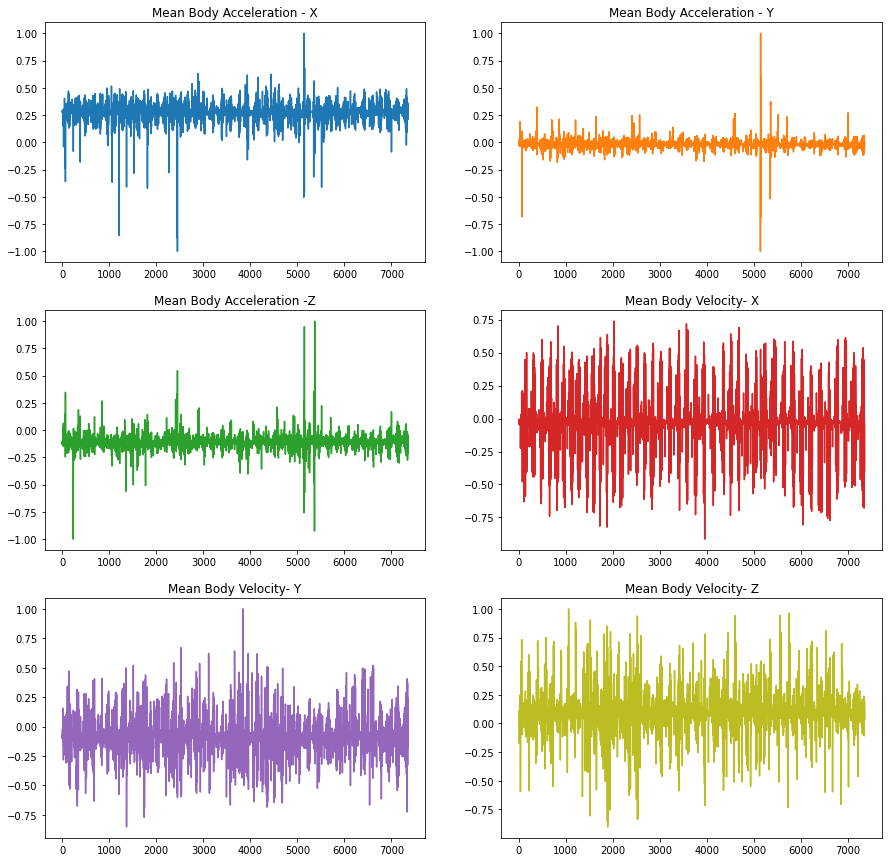

In [ ]:
# let's do some simple line plots- we are looking at time-series data so this makes sense
# data[['tBodyAccmeanX', 'tBodyAccmeanY','tBodyAccmeanZ','tBodyGyromeanX','tBodyGyromeanY','tBodyGyromeanZ']]
fig, axs = plt.subplots(3, 2,figsize=(15,15))
axs[0, 0].plot(train['tBodyAccmeanX'])
axs[0, 0].set_title('Mean Body Acceleration - X')
axs[0, 1].plot(train['tBodyAccmeanY'], 'tab:orange')
axs[0, 1].set_title('Mean Body Acceleration - Y')
axs[1, 0].plot(train['tBodyAccmeanZ'], 'tab:green')
axs[1, 0].set_title('Mean Body Acceleration -Z')
axs[1, 1].plot(train['tBodyGyromeanX'], 'tab:red')
axs[1, 1].set_title('Mean Body Velocity- X')
axs[2, 0].plot(train['tBodyGyromeanY'], 'tab:purple')
axs[2, 0].set_title('Mean Body Velocity- Y')
axs[2, 1].plot(train['tBodyGyromeanZ'], 'tab:olive')
axs[2, 1].set_title('Mean Body Velocity- Z')


KeyError: "None of [Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyGyromeanX',\n       'tBodyGyromeanY', 'tBodyGyromeanZ'],\n      dtype='object')] are in the [columns]"

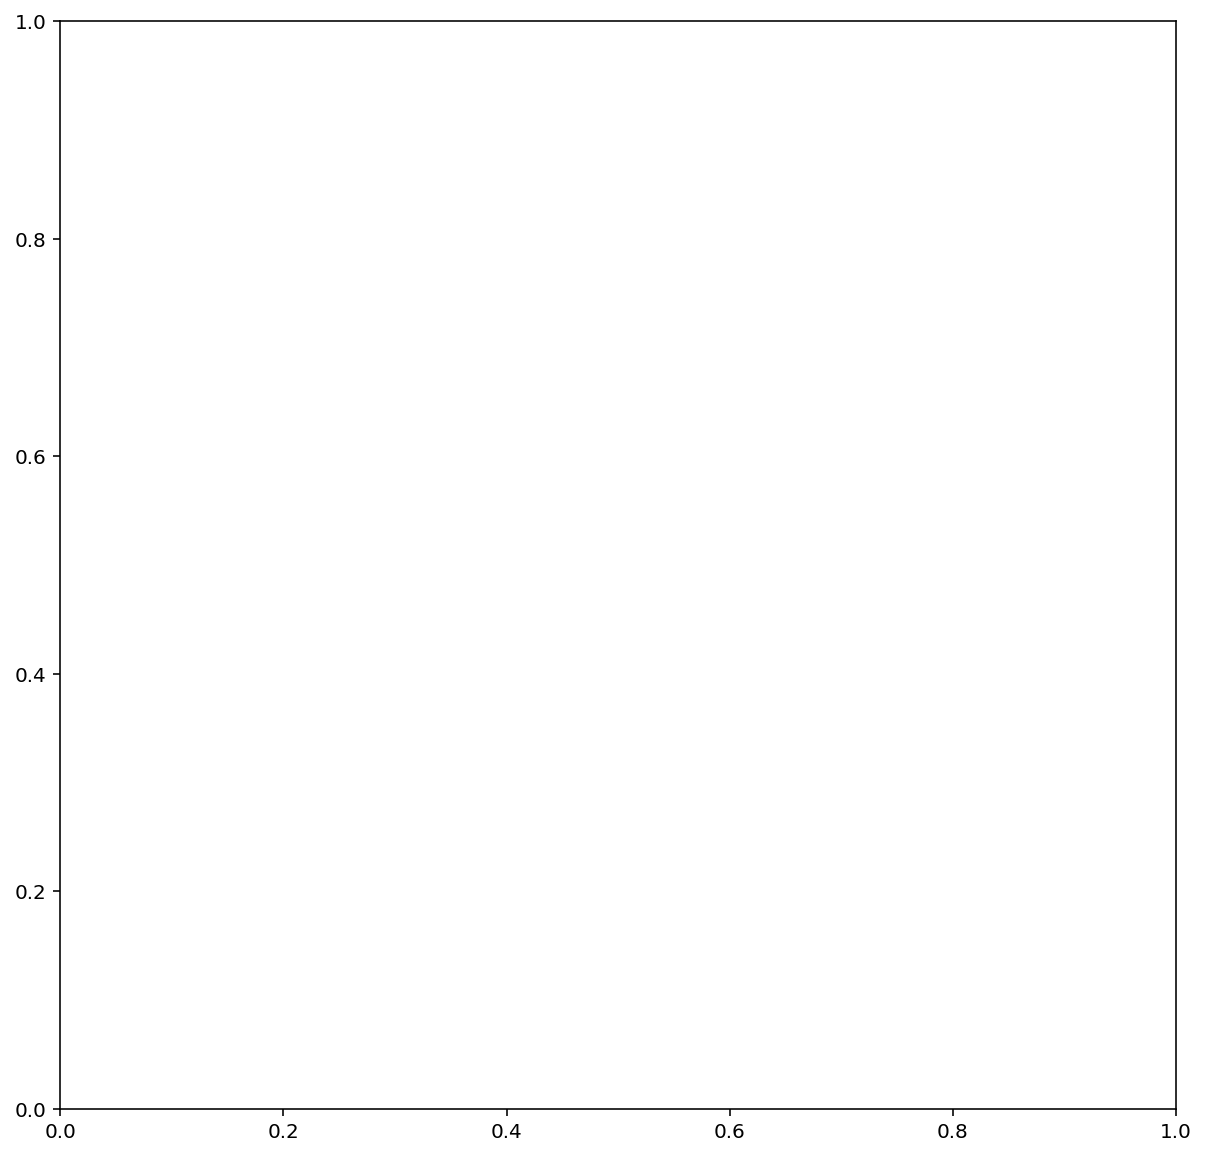

In [18]:
# Check for class imbalance, plot distribution of classes (hint: seaborn's countplot)

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(train[['tBodyAccmeanX', 'tBodyAccmeanY','tBodyAccmeanZ','tBodyGyromeanX','tBodyGyromeanY','tBodyGyromeanZ']].T)
plt.show()

- Is there an even distribution?

### Select data columns from data to visualize

In [ ]:
data = train.drop(['subject','Activity'],axis=1)

In [ ]:
# what are our features again?
data.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagmeanFreq', 'fBodyBodyGyroJerkMagskewness',
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean'],
      dtype='object', length=561)

In [ ]:
# Try plotting a heatmap: pick some features and use seaborn's heatmap



#2. Feature Engineering from domain Knowledge

- Stationary and Moving activities are completely different:

Static and Dynamic Activities

In static activities (sit, stand, lie down) motion information will not be very useful.
In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.

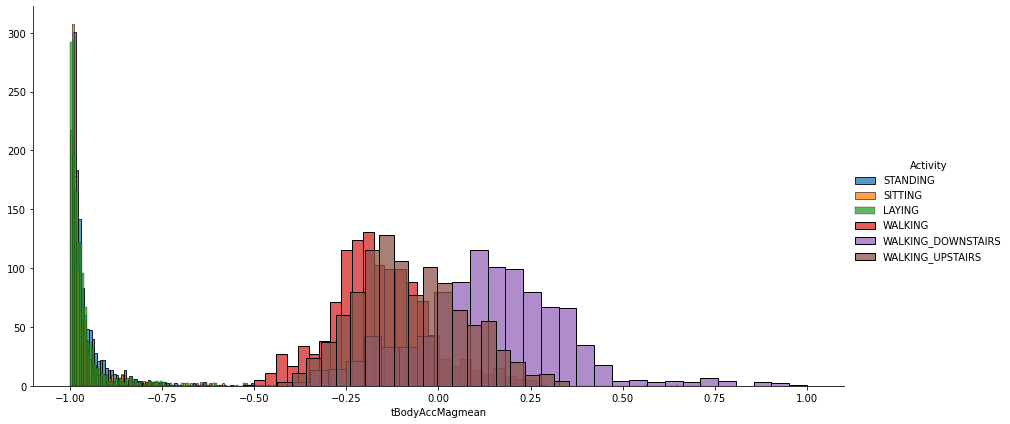

In [ ]:
# Using domain knowledge, we know we can seperate the static activities from the dynamic ones just by looking at Total Body Acceleration (tBOdyAccMagmean)
# Here are histogram plots of the total body acceleration of each activity. 

# Notice how there are two groups of data! 
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='Activity', height=6,aspect=2)
facetgrid.map(sns.histplot,'tBodyAccMagmean').add_legend()
plt.show()

## What can we learn from this plot?

- we can clearly see the difference between Stationary Activities and Moving Activities
- Let's take a look closer by dividing these pdfs using the total acceleration mean:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3

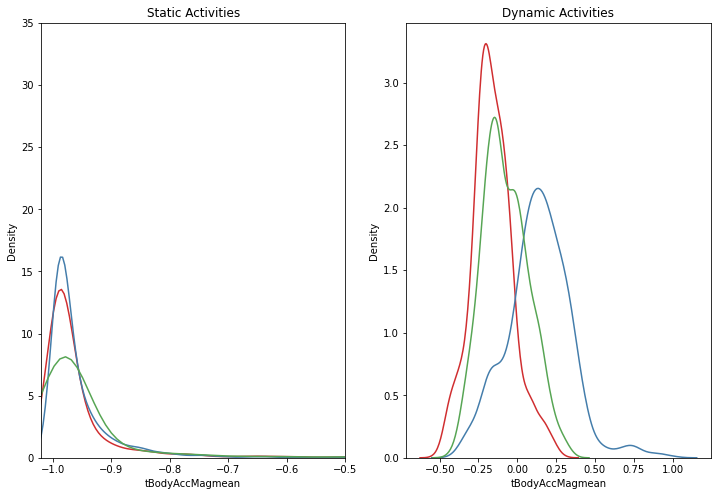

In [ ]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities")
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMagmean'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMagmean'],hist = False,label = 'Standing')
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMagmean'],hist = False, label = 'Laying')
plt.axis([-1.02, -0.5, 0, 35])

plt.subplot(1,2,2)
plt.title("Dynamic Activities")
sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMagmean'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMagmean'],hist = False,label = 'Standing')
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMagmean'],hist = False, label = 'Laying')

- We can seperate these two types of activities using Mean Acceleration

In [ ]:
# Try using a box plot (seaborn's boxplot) and plotting 'tBodyAccMagmean' to see if we can seperate these two types of activities



Observations:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.

We can classify 75% the Acitivity labels with some errors.

#### - Additionally, position of GravityAccelerationComponants also matters

## We learned a lot from our data just from plotting it and inferring information from the visualizations
- We saw that there are two categories of classes: dynamic and stationary
- We saw that mean acceleration and gravity acceleration are very important for classifying activity

Next we can look in to: Are the different acitivties seperatable?